In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
#import matplotlib.legend as legend
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data,city_data,on='city',how='inner')

# Display the data table for preview
   


In [2]:
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

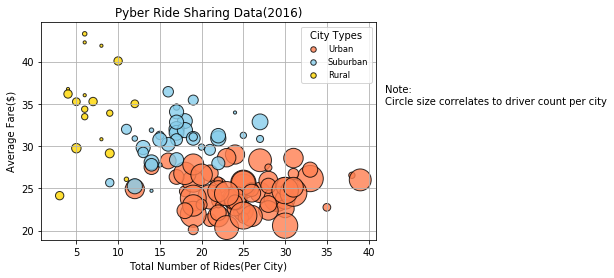

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Creating a dataseries one each for city type

urban_data = city_ride_data[city_ride_data['type'] == 'Urban']
rural_data = city_ride_data[city_ride_data['type'] == 'Rural']
suburban_data = city_ride_data[city_ride_data['type'] == 'Suburban']


# Creating 3 group by series for each dataseries based on driver cout, number of rides and average fare

urbandrivercount = urban_data.groupby('city').max()['driver_count']
urbanridecount = urban_data.groupby('city').count()['ride_id'] 
urbanridemean = urban_data.groupby('city').mean()['fare']

ruraldrivercount = rural_data.groupby('city').max()['driver_count']
ruralridecount = rural_data.groupby('city').count()['ride_id'] 
ruralridemean = rural_data.groupby('city').mean()['fare']

suburbandrivercount = suburban_data.groupby('city').max()['driver_count']
suburbanridecount = suburban_data.groupby('city').count()['ride_id'] 
suburbanridemean = suburban_data.groupby('city').mean()['fare']


#urban_df.head()

# Build the scatter plots for each city types

plt.scatter(x=urbanridecount,y=urbanridemean, c='Coral' , s = urbandrivercount*10 , alpha=0.8, edgecolors='black', linewidths= 1, label = 'Urban')
plt.scatter(x=suburbanridecount,y=suburbanridemean, c='SkyBlue',s = suburbandrivercount*10,  alpha=0.8, edgecolors='black',linewidths= 1, label = 'Suburban')
plt.scatter(x=ruralridecount,y=ruralridemean, c='Gold', s = ruraldrivercount*10, alpha=0.8,  edgecolors='black', linewidths= 1,label = 'Rural')


# Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.grid()

# Create a legend
#legend()
#plt.legend(handles=['a','b','c'], title="title", loc=4, fontsize='small', fancybox=True)
legend = plt.legend(loc="upper right", title="City Types",fontsize='small')
legend.legendHandles[0]._sizes =[30]
legend.legendHandles[1]._sizes =[30]
legend.legendHandles[2]._sizes =[30]


# Incorporate a text label regarding circle size

plt.text(y=35,x=42, s="Note: \nCircle size correlates with driver count per city")

#Save Figure

plt.savefig('PyberRideSharingData(2016)')


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

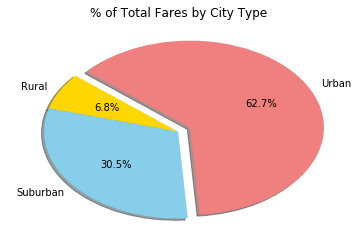

In [5]:
# Calculate Type Percents

#Creating a series to group by city type and sum the fares
ridetypes = city_ride_data.groupby('type')['fare'].sum()
#ridetypes.index
#ridetypes.values


# Build Pie Chart
colors = ["Gold" ,  "SKyBlue", "LightCoral"]
plt.pie(ridetypes.values, explode=[0,0,.1], labels=ridetypes.index ,  colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')


# Save Figure
plt.savefig("%ofTotalFaresbyCityType.png")


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

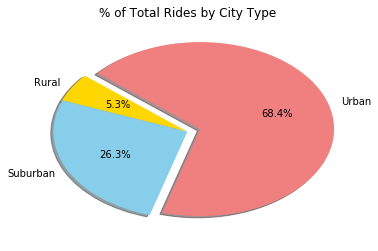

In [7]:
# Calculate Ride Percents
#Creating a series to group by city type and count the rides
ridecounts = city_ride_data.groupby('type')['ride_id'].count()

# Build Pie Chart

colors = ["Gold" ,  "SkyBlue", "LightCoral"]
plt.pie(ridecounts.values, explode=[0,0,.1], labels=ridecounts.index ,  colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')


# Save Figure
plt.savefig("%ofTotalRidesbyCityType")


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

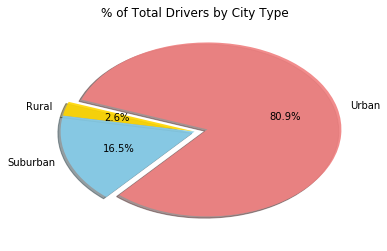

In [11]:
# Calculate Driver Percents
#Creating a series to group by city type and count the #drivers

drivercounts = city_data.groupby('type')['driver_count'].sum()

# Build Pie Charts
colors = ["Gold" ,  "SKyBlue", "LightCoral"]
plt.pie(drivercounts.values, explode=[0,0,.1], labels=drivercounts.index ,  colors=colors, autopct="%1.1f%%", shadow=True, startangle=160, wedgeprops={'alpha':0.9})

#plt.pie(drivercounts['driver_count'].value_counts(), wedgeprops={'alpha':0.5})

plt.title('% of Total Drivers by City Type')

# Save Figure

plt.savefig("%ofTotalDriversbyCityType")


In [10]:
# Show Figure
plt.show()